Feature Engineering: Scalling

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, LabelBinarizer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [22]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
df_tips = tips[['total_bill', 'tip']].copy()
df_tips.head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


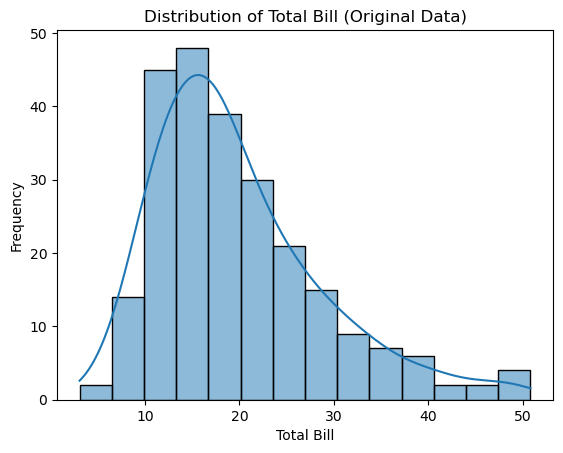

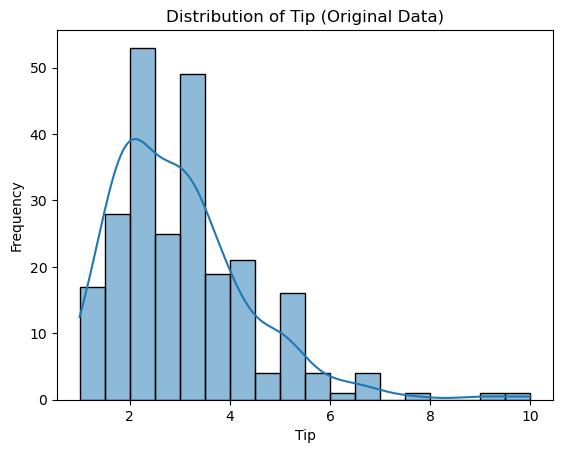

In [24]:
# Plot histogram with distribution line for 'total_bill'
sns.histplot(df_tips['total_bill'], kde=True)
plt.title('Distribution of Total Bill (Original Data)')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

# Plot histogram with distribution line for 'tip'
sns.histplot(df_tips['tip'], kde=True)
plt.title('Distribution of Tip (Original Data)')
plt.xlabel('Tip')
plt.ylabel('Frequency')
plt.show()

In [25]:
minmax_scaler_result = pd.DataFrame(MinMaxScaler().fit_transform(df_tips), columns=df_tips.columns)
minmax_scaler_result

,total_bill,tip
0,0.291579,0.001111
1,0.152283,0.073333
2,0.375786,0.277778
3,0.431713,0.256667
4,0.450775,0.290000
...,...,...
239,0.543779,0.546667
240,0.505027,0.111111
241,0.410557,0.111111
242,0.308965,0.083333


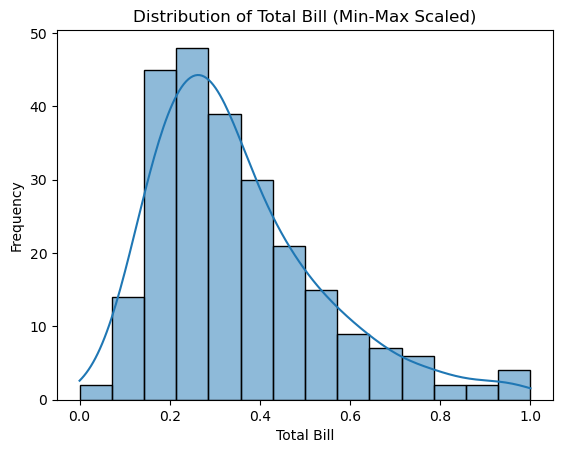

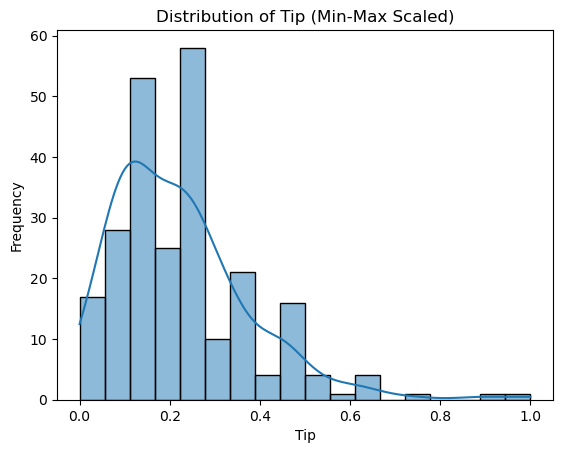

In [26]:
# Plot histogram with distribution line for 'total_bill'
sns.histplot(minmax_scaler_result['total_bill'], kde=True)
plt.title('Distribution of Total Bill (Min-Max Scaled)')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

# Plot histogram with distribution line for 'tip'
sns.histplot(minmax_scaler_result['tip'], kde=True)
plt.title('Distribution of Tip (Min-Max Scaled)')
plt.xlabel('Tip')
plt.ylabel('Frequency')
plt.show()

In [27]:
standard_scaler_result = pd.DataFrame(StandardScaler().fit_transform(df_tips), columns=df_tips.columns)
standard_scaler_result

,total_bill,tip
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


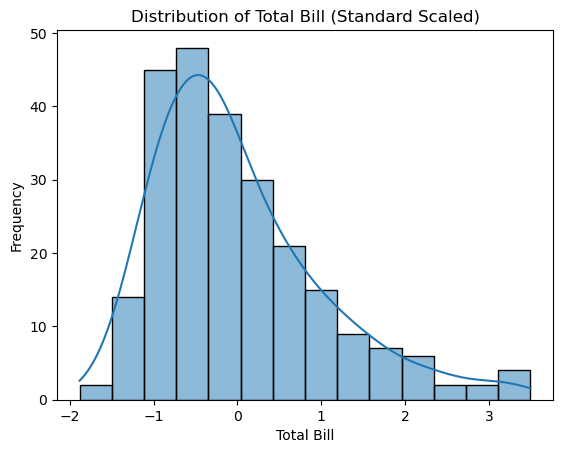

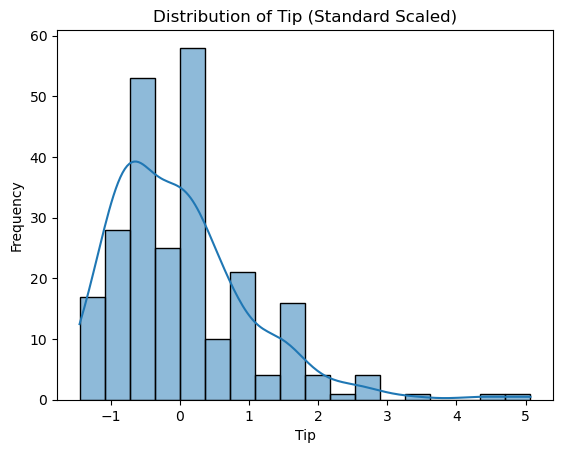

In [28]:
# Plot histogram with distribution line for 'total_bill'
sns.histplot(standard_scaler_result['total_bill'], kde=True)
plt.title('Distribution of Total Bill (Standard Scaled)')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

# Plot histogram with distribution line for 'tip'
sns.histplot(standard_scaler_result['tip'], kde=True)
plt.title('Distribution of Tip (Standard Scaled)')
plt.xlabel('Tip')
plt.ylabel('Frequency')
plt.show()

In [29]:
robust_scaler_result = pd.DataFrame(RobustScaler().fit_transform(df_tips), columns=df_tips.columns)
robust_scaler_result

,total_bill,tip
0,-0.074675,-1.2096
1,-0.691558,-0.7936
2,0.298237,0.3840
3,0.545918,0.2624
4,0.630334,0.4544
...,...,...
239,1.042208,1.9328
240,0.870594,-0.5760
241,0.452226,-0.5760
242,0.002319,-0.7360


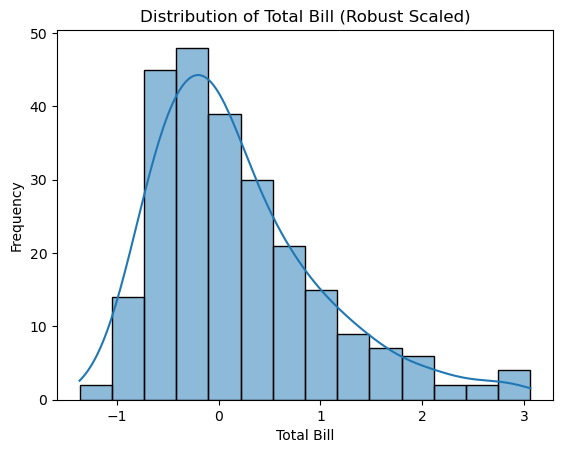

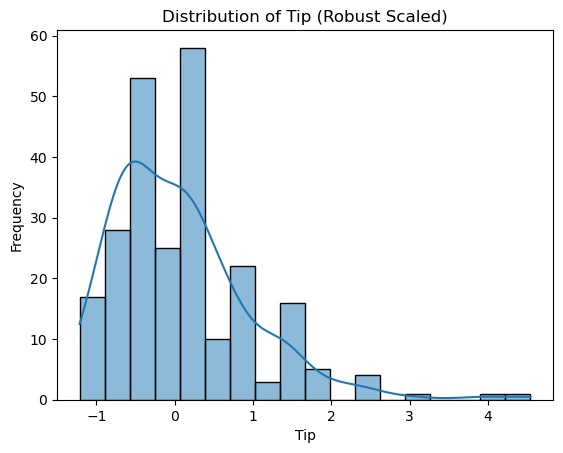

In [30]:
# Plot histogram with distribution line for 'total_bill'
sns.histplot(robust_scaler_result['total_bill'], kde=True)
plt.title('Distribution of Total Bill (Robust Scaled)')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

# Plot histogram with distribution line for 'tip'
sns.histplot(robust_scaler_result['tip'], kde=True)
plt.title('Distribution of Tip (Robust Scaled)')
plt.xlabel('Tip')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='total_bill', ylabel='Count'>

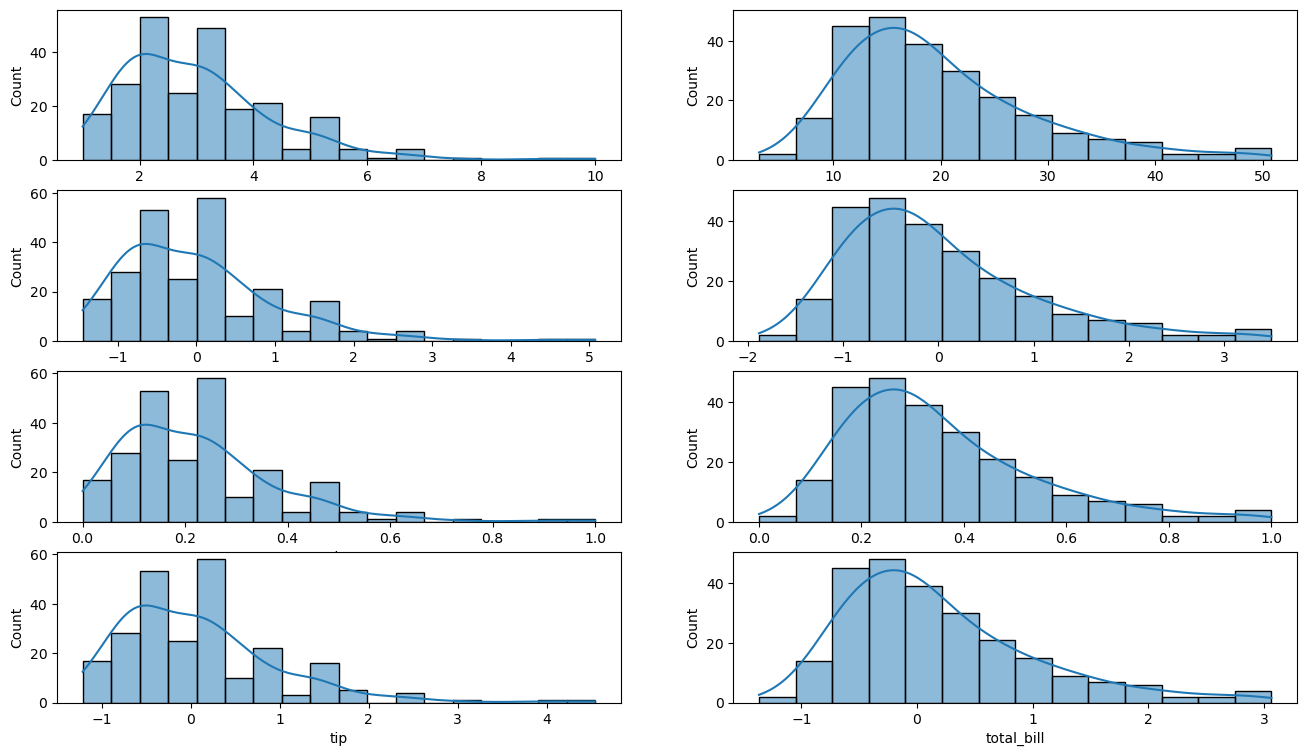

In [31]:
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(16, 9))

# Original Data
sns.histplot(
    data=df_tips,
    x='tip',
    ax=axes[0][0],
    kde=True
)
sns.histplot(
    data=df_tips,
    x='total_bill',
    ax=axes[0][1],
    kde=True
)

# Standard Scaler
sns.histplot(
    data=standard_scaler_result,
    x='tip',
    ax=axes[1][0],
    kde=True
)
sns.histplot(
    data=standard_scaler_result,
    x='total_bill',
    ax=axes[1][1],
    kde=True
)

# MinMax Scaler
sns.histplot(
    data=minmax_scaler_result,
    x='tip',
    ax=axes[2][0],
    kde=True
)
sns.histplot(
    data=minmax_scaler_result,
    x='total_bill',
    ax=axes[2][1],
    kde=True
)

# Robust Scaler
sns.histplot(
    data=robust_scaler_result,
    x='tip',
    ax=axes[3][0],
    kde=True
)
sns.histplot(
    data=robust_scaler_result,
    x='total_bill',
    ax=axes[3][1],
    kde=True
)

-------------------------------------------------------------------------

Feature Engineering: Encoding

Encoding paling bagus: One Hot Encoding bisa untuk data categorical yang: Ordinal dan Nominal

In [67]:
tips_encoded = tips.copy()

In [68]:
encoder_jenis_kelamin = LabelEncoder()
encoder_jenis_kelamin.fit(tips_encoded['sex'])

LabelEncoder()

In [69]:
tips_encoded['sex'] = encoder_jenis_kelamin.transform(tips_encoded['sex'])
tips_encoded

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,Sun,Dinner,2
1,10.34,1.66,1,No,Sun,Dinner,3
2,21.01,3.50,1,No,Sun,Dinner,3
3,23.68,3.31,1,No,Sun,Dinner,2
4,24.59,3.61,0,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,No,Sat,Dinner,3
240,27.18,2.00,0,Yes,Sat,Dinner,2
241,22.67,2.00,1,Yes,Sat,Dinner,2
242,17.82,1.75,1,No,Sat,Dinner,2


In [70]:
hasil_inverse_jenis_kelamin = encoder_jenis_kelamin.inverse_transform(tips_encoded['sex'])
print(hasil_inverse_jenis_kelamin)

['Female' 'Male' 'Male' 'Male' 'Female' 'Male' 'Male' 'Male' 'Male' 'Male'
 'Male' 'Female' 'Male' 'Male' 'Female' 'Male' 'Female' 'Male' 'Female'
 'Male' 'Male' 'Female' 'Female' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male'
 'Female' 'Male' 'Male' 'Female' 'Female' 'Male' 'Male' 'Male' 'Female'
 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male'
 'Male' 'Male' 'Male' 'Female' 'Female' 'Male' 'Male' 'Male' 'Male'
 'Female' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Female'
 'Female' 'Male' 'Male' 'Male' 'Female' 'Female' 'Female' 'Female' 'Male'
 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Female' 'Male' 'Male' 'Female'
 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Female' 'Female' 'Female'
 'Male' 'Male' 'Male' 'Male' 'Male' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Male' 'Male' 'Male' 'Male' 'Female' 'Male' 'Female' 'Male'
 'Male' 'Female' 'Female' 'Male' 'Female' 'Female' 'Female' 'Male'
 'Female' 'Male' 'Male' 'Female' 'Female' 'Male' 'Female' 'Femal

In [71]:
label_binarizer_test = LabelBinarizer()
label_binarizer_test.fit(tips['time'])

LabelBinarizer()

In [72]:
tips_encoded['time'] = label_binarizer_test.transform(tips['time'])
tips_encoded

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,Sun,0,2
1,10.34,1.66,1,No,Sun,0,3
2,21.01,3.50,1,No,Sun,0,3
3,23.68,3.31,1,No,Sun,0,2
4,24.59,3.61,0,No,Sun,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,No,Sat,0,3
240,27.18,2.00,0,Yes,Sat,0,2
241,22.67,2.00,1,Yes,Sat,0,2
242,17.82,1.75,1,No,Sat,0,2


In [73]:
hasil_inverse_time = label_binarizer_test.inverse_transform(tips_encoded['time'])
hasil_inverse_time

array(['Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner',
       'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Lunch', 'Lunch',
       'Lunch', 'Lunch', 'Lunch', 'Lunch', 'Lunch', 'Lunch', 'Lunch',
       'Lunch', 'Lunch', 'Lunch', 'Lunch', 'Dinner'

In [74]:
smoker_binarizer = LabelBinarizer()
smoker_binarizer.fit(tips_encoded['smoker'])
tips_encoded['smoker'] = smoker_binarizer.transform(tips_encoded['smoker'])
tips_encoded

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,Sun,0,2
1,10.34,1.66,1,0,Sun,0,3
2,21.01,3.50,1,0,Sun,0,3
3,23.68,3.31,1,0,Sun,0,2
4,24.59,3.61,0,0,Sun,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,Sat,0,3
240,27.18,2.00,0,1,Sat,0,2
241,22.67,2.00,1,1,Sat,0,2
242,17.82,1.75,1,0,Sat,0,2


In [75]:
hasil_inverse_smoker = smoker_binarizer.inverse_transform(tips_encoded['smoker'])
hasil_inverse_smoker

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No

In [76]:
day_encoder = OneHotEncoder(sparse_output=False)
day_encoder.fit(pd.DataFrame(tips_encoded['day']))

OneHotEncoder(sparse_output=False)

In [77]:
hasil_encoder_day = day_encoder.transform(pd.DataFrame(tips_encoded['day']))
print(hasil_encoder_day)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0.

In [78]:
day_encoder.categories_

[array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object)]

In [79]:
day_dataframe = pd.DataFrame(data=hasil_encoder_day, columns=day_encoder.categories_)
day_dataframe.head()

,Fri,Sat,Sun,Thur
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [80]:
tips_encoded = pd.concat([tips_encoded, day_dataframe], axis=1)
tips_encoded

,total_bill,tip,sex,smoker,day,time,size,"(Fri,)","(Sat,)","(Sun,)","(Thur,)"
0,16.99,1.01,0,0,Sun,0,2,0.0,0.0,1.0,0.0
1,10.34,1.66,1,0,Sun,0,3,0.0,0.0,1.0,0.0
2,21.01,3.50,1,0,Sun,0,3,0.0,0.0,1.0,0.0
3,23.68,3.31,1,0,Sun,0,2,0.0,0.0,1.0,0.0
4,24.59,3.61,0,0,Sun,0,4,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,Sat,0,3,0.0,1.0,0.0,0.0
240,27.18,2.00,0,1,Sat,0,2,0.0,1.0,0.0,0.0
241,22.67,2.00,1,1,Sat,0,2,0.0,1.0,0.0,0.0
242,17.82,1.75,1,0,Sat,0,2,0.0,1.0,0.0,0.0


-------------------------------------------------

Coba bikin model ML buat ngetest hasil Feature Engineering: Encoded

In [82]:
X_original = tips[['total_bill', 'size']].copy()
y_original = tips['tip'].copy()

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.2, random_state=2020)

In [86]:
GBR_original = GradientBoostingRegressor().fit(X=X_train, y=y_train)

In [88]:
GBR_original.score(X=X_train, y=y_train)

0.8516645720963483

In [89]:
GBR_original.score(X=X_test, y=y_test)

0.21874232108210068

In [ ]:
tips

----------------------------------------------------------------

Feature Engineering: Missing Value

In [92]:
df_adult_data = pd.read_csv('adult.csv')
df_adult_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


---------------------------------------